In [1]:
import numpy as np # linear algebra
import os # accessing directory structure
import pandas as pd 


In [3]:
df=pd.read_csv('data.csv',sep=',', encoding='latin-1')
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [4]:
df.isnull().sum()

id                           0
diagnosis                    0
radius_mean                  0
texture_mean                 0
perimeter_mean               0
area_mean                    0
smoothness_mean              0
compactness_mean             0
concavity_mean               0
concave points_mean          0
symmetry_mean                0
fractal_dimension_mean       0
radius_se                    0
texture_se                   0
perimeter_se                 0
area_se                      0
smoothness_se                0
compactness_se               0
concavity_se                 0
concave points_se            0
symmetry_se                  0
fractal_dimension_se         0
radius_worst                 0
texture_worst                0
perimeter_worst              0
area_worst                   0
smoothness_worst             0
compactness_worst            0
concavity_worst              0
concave points_worst         0
symmetry_worst               0
fractal_dimension_worst      0
Unnamed:

no null values dropping unnamed as its completelu useless for us and full of null values

## PREPROCESSING

In [5]:
df.drop(['Unnamed: 32'], axis = 1 , inplace=True)
df.drop(['id'],axis=1, inplace=True)

dependant attribute diagnosis, independant id , rest all dependaant as they belong to the same nucleas or cells

In [6]:
df.isnull().sum()

diagnosis                  0
radius_mean                0
texture_mean               0
perimeter_mean             0
area_mean                  0
smoothness_mean            0
compactness_mean           0
concavity_mean             0
concave points_mean        0
symmetry_mean              0
fractal_dimension_mean     0
radius_se                  0
texture_se                 0
perimeter_se               0
area_se                    0
smoothness_se              0
compactness_se             0
concavity_se               0
concave points_se          0
symmetry_se                0
fractal_dimension_se       0
radius_worst               0
texture_worst              0
perimeter_worst            0
area_worst                 0
smoothness_worst           0
compactness_worst          0
concavity_worst            0
concave points_worst       0
symmetry_worst             0
fractal_dimension_worst    0
dtype: int64

In [7]:
df = df.replace(["B", "M"], [0, 1])
df.head()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,1,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,1,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,1,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,1,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [8]:
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler

In [9]:
scaler = MinMaxScaler()
scaled = scaler.fit_transform(df)
scaled = pd.DataFrame(scaled)
col = df.columns
scaled.set_axis(col,axis=1,inplace=True)
scaled.head()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,1.0,0.521037,0.022658,0.545989,0.363733,0.593753,0.792037,0.703140,0.731113,0.686364,...,0.620776,0.141525,0.668310,0.450698,0.601136,0.619292,0.568610,0.912027,0.598462,0.418864
1,1.0,0.643144,0.272574,0.615783,0.501591,0.289880,0.181768,0.203608,0.348757,0.379798,...,0.606901,0.303571,0.539818,0.435214,0.347553,0.154563,0.192971,0.639175,0.233590,0.222878
2,1.0,0.601496,0.390260,0.595743,0.449417,0.514309,0.431017,0.462512,0.635686,0.509596,...,0.556386,0.360075,0.508442,0.374508,0.483590,0.385375,0.359744,0.835052,0.403706,0.213433
3,1.0,0.210090,0.360839,0.233501,0.102906,0.811321,0.811361,0.565604,0.522863,0.776263,...,0.248310,0.385928,0.241347,0.094008,0.915472,0.814012,0.548642,0.884880,1.000000,0.773711
4,1.0,0.629893,0.156578,0.630986,0.489290,0.430351,0.347893,0.463918,0.518390,0.378283,...,0.519744,0.123934,0.506948,0.341575,0.437364,0.172415,0.319489,0.558419,0.157500,0.142595


### Visualization 

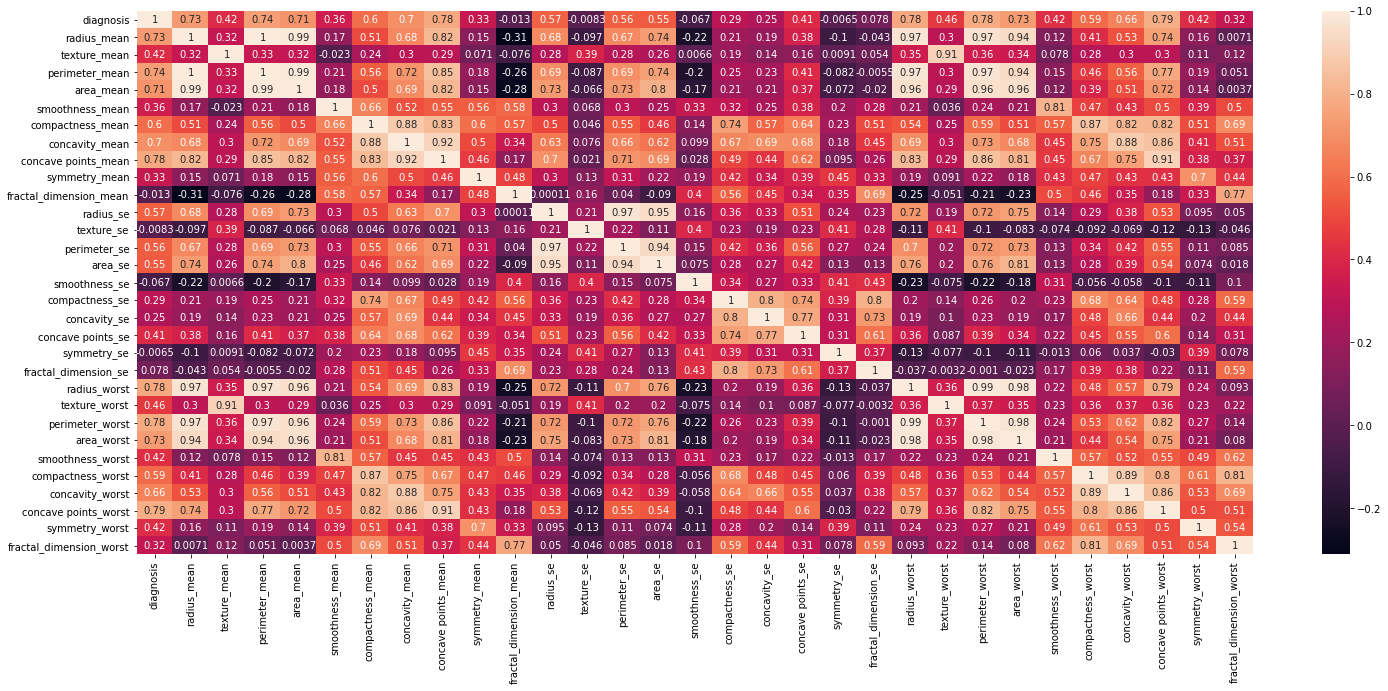

In [10]:
import seaborn as sns
plt.figure(figsize=(25,10))
sns.heatmap(scaled.corr(),annot=True)
plt.show()

In [11]:
import warnings
%matplotlib inline
warnings.filterwarnings(action='ignore')

### Linear Seperability 

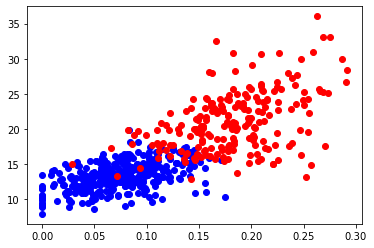

In [12]:
df_label_B = df.where(df["diagnosis"] == 0)
df_label_M = df.where(df["diagnosis"] == 1)
plt.scatter(df_label_B["concave points_worst"], df_label_B["radius_worst"], color="blue")
plt.scatter(df_label_M["concave points_worst"], df_label_M["radius_worst"], color="red")

not linearly seperable as we cannot divide the class into two parts with a single linear line

In [13]:
scale_data = scaled.drop(columns=['diagnosis'])

In [14]:
pca = PCA(n_components='mle')
pca.fit(scale_data)
df = pca.transform(scale_data)
df = pd.DataFrame(df)
df.head()

,0,1,2,3,4,5,6,7,8,9,...,19,20,21,22,23,24,25,26,27,28
0,1.387021,0.426895,-0.541703,0.048483,-0.072198,0.190817,0.236313,-0.039456,0.077590,0.155295,...,-0.029869,-0.038614,-0.000393,0.005447,0.002981,0.021314,-0.004816,-0.041267,-0.004325,0.006223
1,0.462308,-0.556947,-0.205175,-0.042830,0.016111,0.015604,0.043139,0.020644,-0.070639,-0.085284,...,-0.002483,0.014691,0.014641,-0.014012,-0.038886,0.010299,0.008140,0.016628,0.004219,-0.000408
2,0.954621,-0.109701,-0.147848,-0.001068,-0.033798,0.069062,-0.108166,0.007362,-0.059335,-0.073689,...,0.049007,-0.005704,0.020294,0.006728,0.009191,-0.016693,0.021733,0.006412,0.005069,0.000954
3,1.000816,1.525089,-0.053271,-0.207916,-0.219381,0.388007,0.194519,0.143499,0.176997,-0.140952,...,0.086874,-0.018699,0.011662,0.013441,-0.039880,0.013644,0.052882,0.012665,0.004402,-0.010145
4,0.626828,-0.302471,-0.409336,0.238811,-0.002192,-0.157212,-0.063308,0.045931,0.002422,0.000545,...,-0.021251,0.005222,-0.011895,-0.002175,0.006904,0.006740,-0.007813,0.007763,-0.004485,0.000637


In [15]:
df['result']=scaled['diagnosis']
df.head()

,0,1,2,3,4,5,6,7,8,9,...,20,21,22,23,24,25,26,27,28,result
0,1.387021,0.426895,-0.541703,0.048483,-0.072198,0.190817,0.236313,-0.039456,0.077590,0.155295,...,-0.038614,-0.000393,0.005447,0.002981,0.021314,-0.004816,-0.041267,-0.004325,0.006223,1.0
1,0.462308,-0.556947,-0.205175,-0.042830,0.016111,0.015604,0.043139,0.020644,-0.070639,-0.085284,...,0.014691,0.014641,-0.014012,-0.038886,0.010299,0.008140,0.016628,0.004219,-0.000408,1.0
2,0.954621,-0.109701,-0.147848,-0.001068,-0.033798,0.069062,-0.108166,0.007362,-0.059335,-0.073689,...,-0.005704,0.020294,0.006728,0.009191,-0.016693,0.021733,0.006412,0.005069,0.000954,1.0
3,1.000816,1.525089,-0.053271,-0.207916,-0.219381,0.388007,0.194519,0.143499,0.176997,-0.140952,...,-0.018699,0.011662,0.013441,-0.039880,0.013644,0.052882,0.012665,0.004402,-0.010145,1.0
4,0.626828,-0.302471,-0.409336,0.238811,-0.002192,-0.157212,-0.063308,0.045931,0.002422,0.000545,...,0.005222,-0.011895,-0.002175,0.006904,0.006740,-0.007813,0.007763,-0.004485,0.000637,1.0


In [16]:
y = df['result']
y

0      1.0
1      1.0
2      1.0
3      1.0
4      1.0
      ... 
564    1.0
565    1.0
566    1.0
567    1.0
568    0.0
Name: result, Length: 569, dtype: float64

In [17]:
X = df.drop(columns=['result'])
X

,0,1,2,3,4,5,6,7,8,9,...,19,20,21,22,23,24,25,26,27,28
0,1.387021,0.426895,-0.541703,0.048483,-0.072198,0.190817,0.236313,-0.039456,0.077590,0.155295,...,-0.029869,-0.038614,-0.000393,0.005447,0.002981,0.021314,-0.004816,-0.041267,-0.004325,0.006223
1,0.462308,-0.556947,-0.205175,-0.042830,0.016111,0.015604,0.043139,0.020644,-0.070639,-0.085284,...,-0.002483,0.014691,0.014641,-0.014012,-0.038886,0.010299,0.008140,0.016628,0.004219,-0.000408
2,0.954621,-0.109701,-0.147848,-0.001068,-0.033798,0.069062,-0.108166,0.007362,-0.059335,-0.073689,...,0.049007,-0.005704,0.020294,0.006728,0.009191,-0.016693,0.021733,0.006412,0.005069,0.000954
3,1.000816,1.525089,-0.053271,-0.207916,-0.219381,0.388007,0.194519,0.143499,0.176997,-0.140952,...,0.086874,-0.018699,0.011662,0.013441,-0.039880,0.013644,0.052882,0.012665,0.004402,-0.010145
4,0.626828,-0.302471,-0.409336,0.238811,-0.002192,-0.157212,-0.063308,0.045931,0.002422,0.000545,...,-0.021251,0.005222,-0.011895,-0.002175,0.006904,0.006740,-0.007813,0.007763,-0.004485,0.000637
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,1.002840,-0.474785,-0.100041,0.272995,-0.083888,-0.309121,-0.129458,0.006007,-0.110997,0.090695,...,0.042517,0.013607,-0.010627,0.012934,0.003513,0.014351,0.035621,0.016787,-0.000146,0.001443
565,0.620757,-0.517200,0.400360,0.182443,-0.092984,-0.046000,-0.083334,-0.111681,0.039792,0.014460,...,0.025963,-0.001500,-0.017748,-0.007164,-0.002360,-0.016228,-0.004027,-0.003234,-0.003532,-0.004459
566,0.226311,-0.287946,0.315224,-0.011747,0.218517,-0.080005,-0.030991,0.015707,-0.108335,-0.076912,...,-0.001435,-0.008239,-0.010243,0.012004,-0.009648,-0.003678,-0.007252,-0.001393,-0.000232,0.001017
567,1.677834,0.335946,0.296116,-0.156305,0.070204,0.109057,0.068626,-0.092474,0.083793,0.005441,...,0.007601,0.008324,0.012901,0.059599,0.021557,0.025748,0.011127,-0.005749,-0.008380,-0.013565


## SVM Modeling and prediction

In [18]:

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state=20)

In [19]:
from sklearn.svm import SVC 
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import accuracy_score as acs
from sklearn.metrics import confusion_matrix


In [20]:
svc_model = SVC(kernel='linear')
svc_model.fit(X_train, y_train)
y_predict = svc_model.predict(X_test)
confusion = confusion_matrix(y_test, y_predict)
print(confusion)

[[66  0]
 [ 1 47]]


In [21]:
# True Positives
TP = confusion[1, 1]
# True Negatives
TN = confusion[0, 0]
# False Positives
FP = confusion[0, 1]
# False Negatives
FN = confusion[1, 0]

In [22]:
print(classification_report(y_test, y_predict))

              precision    recall  f1-score   support

         0.0       0.99      1.00      0.99        66
         1.0       1.00      0.98      0.99        48

    accuracy                           0.99       114
   macro avg       0.99      0.99      0.99       114
weighted avg       0.99      0.99      0.99       114



In [23]:
acs(y_test,y_predict)

0.9912280701754386

different process for calculating specificity

In [24]:
print(TN / float(TN + FP))

1.0


In [25]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
print(roc_auc_score(y_test, y_predict))

0.9895833333333333


The model has an accuracy of 99%

In [26]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2,random_state=20)
svm_model = SVC(kernel='poly')
svm_model.fit(X_train,y_train)
y_predict = svm_model.predict(X_test)

In [27]:
confusion = confusion_matrix(y_test, y_predict)
print(confusion)

[[66  0]
 [11 37]]


In [28]:
# True Positives
TP = confusion[1, 1]
# True Negatives
TN = confusion[0, 0]
# False Positives
FP = confusion[0, 1]
# False Negatives
FN = confusion[1, 0]

In [29]:
print(classification_report(y_test, y_predict))

              precision    recall  f1-score   support

         0.0       0.86      1.00      0.92        66
         1.0       1.00      0.77      0.87        48

    accuracy                           0.90       114
   macro avg       0.93      0.89      0.90       114
weighted avg       0.92      0.90      0.90       114



In [30]:
acs(y_test,y_predict)

0.9035087719298246

In [31]:
print(TN / float(TN + FP))

1.0


From the above models of svm we can clearly inferece that , for the given data set the most accurate prediction is given by 
the linear model of svm ( my assumtion would be as the data set is linear and small in size).